# Principal Component Analysis

### Using Scikit-learn's version and implementing from scratch
We will explore how Principal Component Analysis works, how to use it and how to implement it from scratch using a Linear Algebra package, in this case NumPy.

| Theory | Tasks |
|:------------ |:--- |
| [Settings for plotly](#Start_Notebook)<br/>[Linear algebra background](#LinAlg_Background)<br/>[Numpy bootcamp](#Numpy_Bootcamp) | [Vector length with matrix operations](#VecLen_MatrixOp)<br/>[Mean of series with matrix operations](#SeriesMean_MatrixOp)<br/>&nbsp; |  
| [Interactive scikit-learn implementation](#Scikit_Intact) | |
| [PCA steps](#PCA_steps)<br/>[Properties of symmetric matrices](#Prop_Symm_Matrix) | |
| [Data compression](#Data_compression) | [Eigenvalue spectrum of an asset correlation matrix](#Eigval_Spec) |

### Start the notebook this way to make plotly work:<a name="Start_Notebook"></a>

jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

### Linear Algebra background<a name="LinAlg_Background"></a>

<b>Eigenvalues:</b>
Given a linear transformation represented by a matrix <b>A</b>, there exist base vectors (also called: basis vectors), <b>x</b>, that are only scaled with (multiplied by) a scalar <b>$\lambda$</b> without adding components from other basis vectors:<br/><br/>
<center>$$\displaystyle{Ax = \lambda x}$$</center>
<br/>
In other words, a vector is an eigenvector of the matrix, <b>A</b>, if and only if this vector's direction does not change when it is multiplied by the matrix <b>A</b>.

<b>Matrix diagonalization:</b>
Given a square matrix <b>A</b> we can decompose it to a set of eigenvalues and corresponding eigenvectors in the following way.

Equation for individual eigenvalues and eigenvectors:

$$A x_1 = x_1 \lambda$$

$$A x_n = x_n \lambda$$

We can write this as:

$$A[x_1 ,..., x_n] = [x_1 \lambda_1 ,..., x_n \lambda_n]$$

$$\begin{bmatrix}\ & & \\ & A &  \\  &  &  \end{bmatrix} \begin{bmatrix}\ | & | & | \\ x_1 & x_2 & x_3 \\ | & | & | \end{bmatrix} = \begin{bmatrix}\ | & | & | \\ x_1 & x_2 & x_3 \\ | & | & | \end{bmatrix} \begin{bmatrix}\lambda_1 & & \\ & ... & \\ & & \lambda_n\end{bmatrix}$$

$$AX = X\Lambda$$

Decomposition of <b>A</b>:
$$A = X\Lambda X^{-1}$$


<b>Principal Component Analysis (PCA):</b>
We can transform the data to the space of the principal components (eigenvectors of <b>A</b>). The first principal component will be the one with the largest corresponding eigenvalue. Note that the eigenvector of the largest eigenvalue indicates the direction of the greatest variance in the data.
The smaller eigenvalues indicate directions in which the variance of the data is smaller. Removing these eigenvectors after data decomposition will ignore these less variable aspects of our data set.

### Numpy bootcamp<a name="Numpy_Bootcamp"></a>

Functions to check out...

Creating vectors / matrices:
- `b = np.array([1, 3, 7])`
- `A = np.array([[1,2,3],[4,5,6],[7,8,9]])`

Dot products:
- `A.dot(b)`
- `np.dot(A, b)`

Slicing and dicing vectors and matrices:
- Second entry: `b[1]`
- First two entries: `b[:2]` (why?)
- Indexing matrices (second row second column): `A[1,1]`

### Exercise: Calculate a vector's length using only matrix operations<a name="VecLen_MatrixOp"></a>

### Exercise: Calculate the mean of a series of numbers using only matrix operations<a name="SeriesMean_MatrixOp">

### Interacting with Scikit-learn's implementation<a name="Scikit_Intact"></a>

In [1]:
# %matplotlib inline renders the figure inside the notebook instead of displaying a dump of the figure object
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider
from sklearn.decomposition import PCA

np.random.seed(3)
sdata_2d = np.random.normal((0, 0), (1, 0.4), (100, 2), )
titles = ['Generated data', 'PCA transformed', 'Inverse transformed']

def rotate_data(datamatrix, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return np.dot(rotation_matrix, datamatrix.T).T
    #rotating inverse direction, multiply from the other side, use transposes

def slide_data(datamatrix, x, y):
    datamatrix[:,0] = datamatrix[:,0] + x
    datamatrix[:,1] = datamatrix[:,1] + y
    return datamatrix
    
def f_plot(data, titles):
    fig, axes = plt.subplots(len(data), 1)
    axes = [axes] if len(data) == 1 else axes
    fig.set_size_inches(6, 6*len(data))
    for ax, d, t in zip(axes, data, titles):
        ax.set_xlim((-6, 6))
        ax.set_ylim((-6, 6))
        ax.set_title(t)
        ax.scatter(d[:, 0], d[:, 1], )        
    return fig, axes

def plot_eigenvectors_scaled(variances, eigenvectors_row, ax):
    for eigenvalue, eigenvector in zip(variances , eigenvectors_row):
        ax.arrow(0, 0, *eigenvector*eigenvalue, head_width=0.1, linewidth=2, color='red')

def update(angle, xMean, yMean):
    angle = float(angle) * np.pi / 180
    rotated = rotate_data(sdata_2d, angle)
    rotated = slide_data(rotated, xMean, yMean)
        
    pca = PCA(whiten=True)
    pca.fit(rotated)
    #print (np.corrcoef(rotated[:,0],rotated[:,1]))
    transformed = pca.transform(rotated)
    #print (np.corrcoef(transformed[:,0],transformed[:,1]))
    inverse = pca.inverse_transform(transformed)
    
    #Scatterplots
    fig, axes = f_plot([rotated, transformed, inverse], titles)
    #Eigenvectors
    plot_eigenvectors_scaled(pca.explained_variance_ , pca.components_, axes[0])
    plt.show()
    print('Explained variance: \n', pca.explained_variance_)
    print('Explained variance ratio: \n', pca.explained_variance_ratio_)
    print('PCA components: \n', pca.components_)
    print('Mean: ', pca.mean_)
    print('Singular values: \n', pca.singular_values_)


interact(update, angle=IntSlider(min=0,max=360,step=1,value=20), \
                 xMean=FloatSlider(min=-3,max=3,step=0.1,value=3), \
                 yMean=FloatSlider(min=-3,max=3,step=0.1,value=1))

<function __main__.update>

## PCA steps<a name="PCA_steps"></a>
##### 1. Get data
##### 2. Centralize
##### 3. Covariance matrix
##### 4. Get eigenvectors, eigenvalues of cov matrix
##### 5. Sort by eigenvalue size
##### 6. Create transformation matrix from top k eigenvectors
##### 7. Transform data
##### 8. Inverse transform data

In [2]:
#1. Generate 2D data
sdata_2d_rot = rotate_data(sdata_2d, float(60) * np.pi / 180)
sdata_2d_rot = slide_data(sdata_2d_rot, 3,1)

In [3]:
#2. centralize
def f_centralize_data(datamatrix, means=None, obsaxis=0):
    #assumes obvervations are in rows
    if means is None:
        means = np.mean(datamatrix, obsaxis, keepdims=True)[0]
    cdata = datamatrix - means
    return (cdata, means)

In [4]:
#3. covariance matrix
def f_covariance_matrix(datamatrix, centralized=0):
    #assumes matrix is this shape [v1;v2;v3;v4;...;vn]
    #if not(centralized):
    (c_matrix, _) = f_centralize_data(datamatrix)
    #using simple matrix multiplication for this
    sm = np.dot(c_matrix.T, c_matrix)
    sm = sm / float(datamatrix.shape[0]-1)
    return sm

In [5]:
#4-5. eigenvectors
def f_eigvecval(covmat, sort=True):
    (eigvals, eigvecs) = np.linalg.eig(covmat)
    if sort:
        desc_order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[desc_order]
        eigvecs = eigvecs[:,desc_order]
    return (eigvals, eigvecs)

In [6]:
#PCA fit: Steps 2-5
def f_pca_fit(datamatrix):    
    (c_matrix, means) = f_centralize_data(datamatrix)    
    my_covariance_matrix = f_covariance_matrix(datamatrix)
    my_eigvals, my_eigvecs = f_eigvecval(my_covariance_matrix) 
    return (means, my_eigvals, my_eigvecs)

In [7]:
#6-7. Transform data
def f_pca_transform(datamatrix, means, eigvals, eigvecs, k=0):
    #Need to add mean subtraction.
    (datamatrix, _) = f_centralize_data(datamatrix, means=means)    
    if (k<=0):
        k=len(eigvals)
    Q = eigvecs[:,:k] 
    print(Q)
    new_data = np.dot(Q.T, datamatrix.T).T #TransformedVectors = TransformMatrix * ColumnVectors form.     
    #How could we rewrite this? Replace the previous transformation with it's simpler form below, filling in the dots:
    #new_data = np.dot(...)
    
    return new_data

In [8]:
#8. Inverse transform
def f_pca_inversetransform(datamatrix, eigvecs, means):    
    if datamatrix.shape[1] < len(means):
        n = datamatrix.shape[0]
        z = np.zeros((n,len(means)-datamatrix.shape[1]))
        datamatrix = np.concatenate((datamatrix, z), axis=1)    
    inv_data = np.dot(eigvecs, datamatrix.T).T        
    (inv_data, _) = f_centralize_data(inv_data, means=-means)
    return inv_data

means: 
 [ 2.93897023  0.88506768]
eigenvalues: 
 [ 0.91347545  0.15939095]
eigenvectors: 
 [[-0.45486117 -0.89056236]
 [-0.89056236  0.45486117]]
[[-0.45486117 -0.89056236]
 [-0.89056236  0.45486117]]


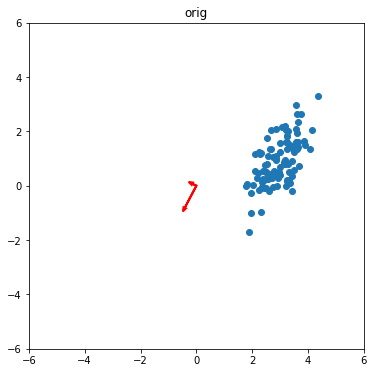

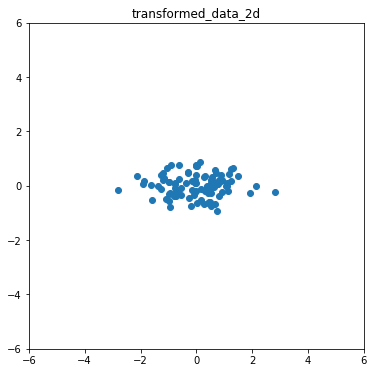

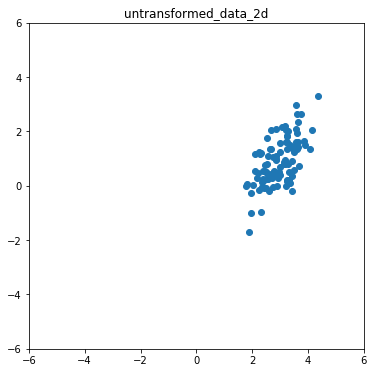

In [9]:
#Test PCA 2D

#Generate data
#rotated = rotate_data(sdata_2d, 30* np.pi / 180)
#orig = slide_data(rotated, 3, 1)
#_ = f_plot([sdata_2d], ['sdata_2d'])
#_ = f_plot([rotated], ['rotated'])

#Load data
import scipy.io as si
mat_dict = si.loadmat('sdata_2d_rot.mat')
loaded_data = mat_dict['sdata_2d']
orig = loaded_data

#Fit PCA
(means_2d, eigvals_2d, eigvecs_2d) = f_pca_fit(orig)
print('means: \n', means_2d)
print('eigenvalues: \n', eigvals_2d)
print('eigenvectors: \n', eigvecs_2d)

#Transform
transformed_data_2d = f_pca_transform(orig, means_2d, eigvals_2d, eigvecs_2d)

#Transform back
untransformed_data_2d = f_pca_inversetransform(transformed_data_2d, eigvecs_2d, means_2d)

#Plots
fig,ax = f_plot([orig], ['orig'])
plot_eigenvectors_scaled(eigvals_2d, eigvecs_2d, ax[0])
_ = f_plot([transformed_data_2d], ['transformed_data_2d'])
_ = f_plot([untransformed_data_2d], ['untransformed_data_2d'])

### Properties of symmetric matrices<a name="Prop_Symm_Matrix"></a>

Symmetric matrices will have all positive (nonnegative) real eigenvalues $\lambda_i$ and orthonormal eigenvectors $x_i$.

As the eigenvector matrix contains orthonormal vectors, it's inverse is it's own transpose:
$$X^{-1}= X^T$$

We can easily check this. If all vectors are orthogonal, $X^T X$ or $X X^T$ will become the identity matrix $I$.

The important implications:
- Matrix $A$ can be decomposed to $$A = X\Lambda X^T$$
- The inverse transformation to be used in PCA is just the transpose of the original tranformation
- Eigenvalues will definitely be positive. This makes sense, variances measured along any direction should not be less than $0$.

In [10]:
#8. Inverse transform?
#What is the inverse of EigVec matrix Q?
#Let's try Q*Q.T = I
eigvecs_2d.dot(eigvecs_2d.T)
#This implies Q inverse is Q.T
#Why does this work? - Q is an orthonormal matrix

array([[  1.00000000e+00,  -7.14401794e-18],
       [ -7.14401794e-18,   1.00000000e+00]])

### Data compression<a name="Data_compression"></a>

By sorting the eigenvalues in decreasing order and projecting onto the top $k$ Principal Components we can compress the original data to less dimensions while losing the least amount of information. We can use the compressed data transformed to the space of the pricipal components or transform it back after losing information after the compression.

<b>Remember:</b>
- Transformation: matrix $Q^T$ constructed from top $k$ eigenvectors of $X$
- Inverse transformation: matrix $Q$ constructed from top all eigenvectors of $X$

means: 
 [ 2.93897023  0.88506768]
eigenvalues: 
 [ 0.91347545  0.15939095]
eigenvectors: 
 [[-0.45486117 -0.89056236]
 [-0.89056236  0.45486117]]
[[-0.45486117]
 [-0.89056236]]


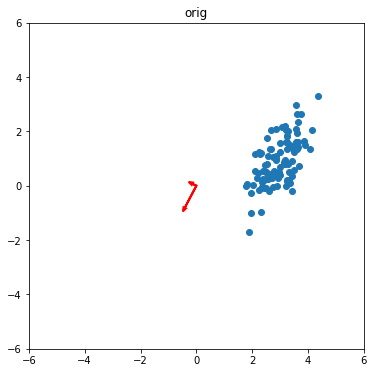

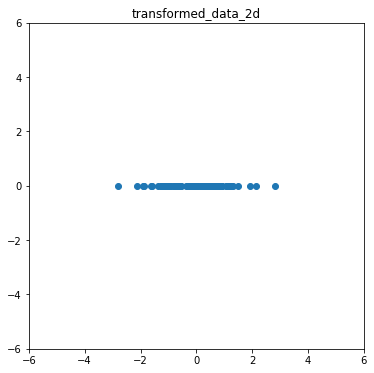

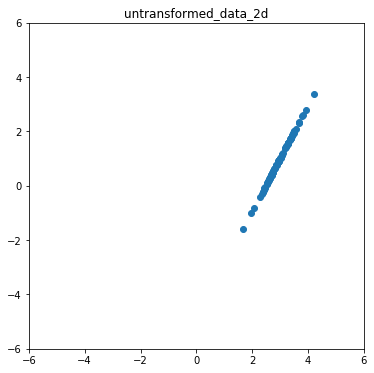

In [11]:
#Test PCA 2D - compression

#Generate data
#rotated = rotate_data(sdata_2d, 30* np.pi / 180)
#orig = slide_data(rotated, 3, 1)
#_ = f_plot([sdata_2d], ['sdata_2d'])
#_ = f_plot([rotated], ['rotated'])

#Load data
import scipy.io as si
mat_dict = si.loadmat('sdata_2d_rot.mat')
loaded_data = mat_dict['sdata_2d']
orig = loaded_data

#Fit PCA
(means_2d, eigvals_2d, eigvecs_2d) = f_pca_fit(orig)
print('means: \n', means_2d)
print('eigenvalues: \n', eigvals_2d)
print('eigenvectors: \n', eigvecs_2d)

#Transform
transformed_data_2d = f_pca_transform(orig, means_2d, eigvals_2d, eigvecs_2d, k=1)
transformed_data_2d_forplot = np.concatenate((transformed_data_2d, np.zeros_like(transformed_data_2d)), axis=1)

#Transform back
untransformed_data_2d = f_pca_inversetransform(transformed_data_2d, eigvecs_2d, means_2d)

#Plots
fig,ax = f_plot([orig], ['orig'])
plot_eigenvectors_scaled(eigvals_2d, eigvecs_2d, ax[0])
_ = f_plot([transformed_data_2d_forplot], ['transformed_data_2d'])
_ = f_plot([untransformed_data_2d], ['untransformed_data_2d'])

In [12]:
#1. Generate 3D data
import numpy as np

np.random.seed(3) # random seed for consistency

means = np.array([1,2,0])
covmat = np.array([[1,0.8,0.6],[0.8,1,0.7],[0.6,0.7,1]])
sdata_3d = np.random.multivariate_normal(means, covmat, 100)
print(sdata_3d.shape)

(100, 3)


In [13]:
#Visalize 3D data
def f_plot3d(datamatrix):
    import plotly.plotly as py
    import plotly.graph_objs as go
    from plotly.offline import init_notebook_mode, iplot
    init_notebook_mode()

    x = datamatrix[:,0]
    y = datamatrix[:,1]
    z = datamatrix[:,2]

    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=10,
            color=z,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )

    data = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='3d-scatter-colorscale')

means: 
 [ 0.9294095   1.88823146 -0.06124059]
eigenvalues: 
 [ 2.36957798  0.50026898  0.17451245]
eigenvectors: 
 [[-0.55354977 -0.58806224 -0.58971642]
 [-0.62484692 -0.17487537  0.76091059]
 [-0.55058966  0.78968437 -0.27064666]]
[[-0.55354977 -0.58806224]
 [-0.62484692 -0.17487537]
 [-0.55058966  0.78968437]]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


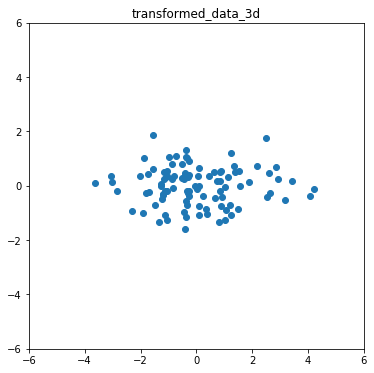

In [14]:
#Fit PCA 3D
orig=sdata_3d
(means_3d, eigvals_3d, eigvecs_3d) = f_pca_fit(orig)
print('means: \n', means_3d)
print('eigenvalues: \n', eigvals_3d)
print('eigenvectors: \n', eigvecs_3d)

#Transform
transformed_data_3d = f_pca_transform(orig, means_3d, eigvals_3d, eigvecs_3d, k=2)

#Transform back
untransformed_data_3d = f_pca_inversetransform(transformed_data_3d, eigvecs_3d, means_3d)

#Plots
f_plot3d(orig)
_ = f_plot([transformed_data_3d], ['transformed_data_3d'])

In [15]:
#Plot untransformed data
f_plot3d(untransformed_data_3d)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Exercise: Check the spectrum of eigenvalues of an asset correlation matrix:<a name="Eigval_Spec"></a>

In [16]:
# Data source:
# http://awgmain.morningstar.com/webhelp/Practice/Plans/Correlation_Matrix_of_the_14_Asset_Classes.htm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load CSV file
data = np.genfromtxt('correlation_matrix.csv', delimiter=',', dtype=np.float64, names=True)
# Get asset class names and correlation values
names = data.dtype.names
count = len(names)
corr = data.view((np.float64, len(data.dtype.names)))
# Show data
print(names)
##corr

('US_Lg_Cap_Growth', 'US_Lg_Cap_Value', 'US_Mid_Cap_Growth', 'US_Mid_Cap_Growth_1', 'US_Sm_Cap_Growth', 'US_Sm_Cap_Val', 'Foreign_Industrialzed_Mkts_Stocks', 'Emerging_Mkts_Stks', 'US_Investment_Grade_Bonds', 'US_High_Yield_Bonds', 'NonUS_Bonds', 'Cash', 'Commodities', 'Real_Estate')


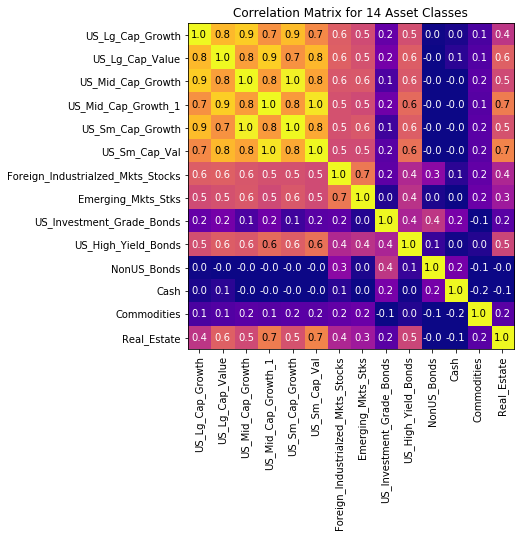

In [17]:
# Plot data as heatmap
plt.figure().set_size_inches(6, 6)
plt.imshow(corr, cmap='plasma', interpolation='nearest', aspect ='equal', vmax=1, vmin=0)

# Show the asset class names
plt.xticks(range(count), names, rotation='vertical')
plt.yticks(range(count), names)
plt.title('Correlation Matrix for 14 Asset Classes')

# Show correlation values as text labels
for x in range(count):
    for y in range(count):
        value = corr[x, y]
        color = 'black' if value > 0.6 else 'white'
        value = '%01.1f' % value
        plt.text(x, y, value, color=color, ha='center', va='center')

plt.show()

Do an eigendecomposition on the previous correlation matrix and create a bar plot of the eigenvalues

Plot a bar chart of the components of the first eigenvector. What do you see?